In [34]:
import pandas as pd
import pickle
import os
import sys
sys.path.append('..\\src')
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm

In [35]:
# Unpickle combined df with repeats removed 
with open('../data/yelp_fsq_combined_norepeatvenues.pickle', 'rb') as df:
    df = pickle.load(df)

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52967 entries, 0 to 52967
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   reference_bike_stn      52967 non-null  object 
 1   fsq_id                  25653 non-null  object 
 2   fsq_cat_id              25653 non-null  float64
 3   fsq_cat_name            25653 non-null  object 
 4   lat                     52967 non-null  float64
 5   long                    52967 non-null  float64
 6   name                    52967 non-null  object 
 7   street_address          51696 non-null  object 
 8   zip                     52947 non-null  object 
 9   city                    52967 non-null  object 
 10  distance_from_bike_stn  52967 non-null  int64  
 11  yelp_id                 27314 non-null  object 
 12  yelp_cat_alias          27314 non-null  object 
 13  price                   23519 non-null  object 
 14  rating                  27314 non-null

In [16]:
df.head(5)

,reference_bike_stn,fsq_id,fsq_cat_id,fsq_cat_name,lat,long,name,street_address,zip,city,distance_from_bike_stn,yelp_id,yelp_cat_alias,price,rating,review_count
0,d0e8f4f1834b7b33a3faf8882f567ab8,4b3fc82cf964a520a1ae25e3,13303.0,Mexican Restaurant,37.850052,-122.270523,Las Palmas Super Burritos and Heros,3221 Adeline St,94703,Berkeley,33,NaN,NaN,NaN,NaN,NaN
1,d0e8f4f1834b7b33a3faf8882f567ab8,57da76a603a44d3f9b3ddd3b,10004.0,Art Gallery,37.849798,-122.271728,Firehouse Collective East/West Art Studios,1835 Harmon St,94703,Berkeley,100,NaN,NaN,NaN,NaN,NaN
2,d0e8f4f1834b7b33a3faf8882f567ab8,4b64bd80f964a52074cc2ae3,13064.0,Pizzeria,37.849316,-122.271629,Domino's Pizza,3264 Adeline St,94703,Berkeley,113,NaN,NaN,NaN,NaN,NaN
3,d0e8f4f1834b7b33a3faf8882f567ab8,4c12e9a51b5cef3b9cd7edc4,13102.0,Cantonese Restaurant,37.848703,-122.270660,Chen's Garden,1818 Alcatraz Ave,94703,Berkeley,119,NaN,NaN,NaN,NaN,NaN
4,d0e8f4f1834b7b33a3faf8882f567ab8,52fe4532498e80c8d231d768,13034.0,Café,37.850958,-122.271077,Rasa Caffe,3140 Martin Luther King Jr Way,94703,Berkeley,141,NaN,NaN,NaN,NaN,NaN


In [36]:
# UNPICKLE CITYBIKES DF
with open('../data/citybikes_filled_df.pickle', 'rb') as df2:
    citybikes_df = pickle.load(df2)

citybikes_df.head(5)

,name,id,timestamp,longitude,latitude,slots,free_bikes,empty_slots,has_ebikes,ebikes,payment,renting,returning
0,Harmon St at Adeline St,d0e8f4f1834b7b33a3faf8882f567ab8,2024-04-02T18:29:27.066000Z,-122.270582,37.849735,15,9,6,True,0,"[key, creditcard]",1,1
1,Fountain Alley at S 2nd St,983514094dd808b1604da2dcfc2d09af,2024-04-02T18:29:26.582000Z,-121.889277,37.336188,11,8,3,True,6,"[key, creditcard]",1,1
2,Oak St at 1st St,da17603652106fda93da4e255a5b0a22,2024-04-02T18:29:27.044000Z,-121.88109,37.322125,23,14,9,True,7,"[key, creditcard]",1,1
3,Bestor Art Park,7a21c92b3b4cd2f7759107b4fdebf869,2024-04-02T18:29:26.797000Z,-121.874119,37.323678,15,12,3,True,3,"[key, creditcard]",1,1
4,5th St at Virginia St,ce34d38fb230a23c1ced12d1e16df294,2024-04-02T18:29:26.971000Z,-121.87712,37.325998,27,19,7,True,12,"[key, creditcard]",1,1


In [37]:
bike_stn_counts = df.groupby('reference_bike_stn').size().reset_index(name='num_venues')
bike_stn_counts.columns = ['id', 'num_venues']
print(bike_stn_counts)

                                   id  num_venues
0    0129b835b33f6afca778ebfb90453aad         100
1    0167c2413c3487d67d1dd7d906389959         100
2    018bfeb8a511bb60ffbb0cab866667ab         100
3    0267ea932e83058a086f124bb3201e01         100
4    02744ef00b430de0440ab88ecff71b2d         100
..                                ...         ...
550  fdf5f4679be9ae94f860552ca46a2648         100
551  fdfed17363937bd17e69bb5f32b67257          88
552  ff03a6199ba2f74b66752643531826ec          98
553  ff965c7f0bb892bf7053a78b4df24275          95
554  fff91ff985e5954b8b94e603a44db763         100

[555 rows x 2 columns]


In [38]:
df2 = pd.DataFrame()
df2['id'] = citybikes_df['id']
df2['slots'] = citybikes_df['slots']

In [21]:
df2

,id,slots
0,d0e8f4f1834b7b33a3faf8882f567ab8,15
1,983514094dd808b1604da2dcfc2d09af,11
2,da17603652106fda93da4e255a5b0a22,23
3,7a21c92b3b4cd2f7759107b4fdebf869,15
4,ce34d38fb230a23c1ced12d1e16df294,27
...,...,...
550,7f53cf83c7bf09ec70e4ae4b751e504f,19
551,c5a5035c0cd5a040596129de7bac29dd,19
552,6b0cd11ea6451ee4bffce5ec7036f895,25
553,083037366ce9a5bc31c501316b4f8714,21


In [39]:
df3 = pd.merge(df2, bike_stn_counts, on='id')
print(df3)

                                   id slots  num_venues
0    d0e8f4f1834b7b33a3faf8882f567ab8    15          99
1    983514094dd808b1604da2dcfc2d09af    11         100
2    da17603652106fda93da4e255a5b0a22    23          85
3    7a21c92b3b4cd2f7759107b4fdebf869    15          85
4    ce34d38fb230a23c1ced12d1e16df294    27          99
..                                ...   ...         ...
550  7f53cf83c7bf09ec70e4ae4b751e504f    19          81
551  c5a5035c0cd5a040596129de7bac29dd    19         100
552  6b0cd11ea6451ee4bffce5ec7036f895    25          90
553  083037366ce9a5bc31c501316b4f8714    21         100
554  a0a5d3b009e300e926558342b46b6be7    18         100

[555 rows x 3 columns]


In [40]:
df3['slots'] = pd.to_numeric(df3['slots'])
print("Data type of 'slots':", df3['slots'].dtype)

Data type of 'slots': int64


In [41]:
X = sm.add_constant(df3['num_venues'])  
Y = df3['slots']

model = sm.OLS(Y, X)
result = model.fit()

print(result.summary())
print("Coefficients:", result.params)
Y_pred = result.predict(X)

                            OLS Regression Results                            
Dep. Variable:                  slots   R-squared:                       0.064
Model:                            OLS   Adj. R-squared:                  0.062
Method:                 Least Squares   F-statistic:                     37.76
Date:                Thu, 18 Apr 2024   Prob (F-statistic):           1.53e-09
Time:                        15:40:28   Log-Likelihood:                -1797.2
No. Observations:                 555   AIC:                             3598.
Df Residuals:                     553   BIC:                             3607.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.4347      3.030      1.133      0.2

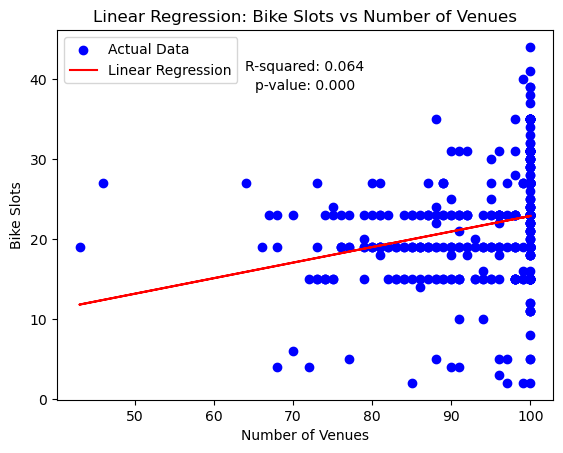

In [42]:
plt.scatter(df3['num_venues'], df3['slots'], color='blue', label='Actual Data')

plt.plot(df3['num_venues'], result.predict(), color='red', label='Linear Regression')

plt.title('Linear Regression: Bike Slots vs Number of Venues')
plt.xlabel('Number of Venues')
plt.ylabel('Bike Slots')
plt.legend()

plt.text(0.5, 0.9, f'R-squared: {result.rsquared:.3f}', ha='center', va='center', transform=plt.gca().transAxes)
plt.text(0.5, 0.85, f'p-value: {result.f_pvalue:.3f}', ha='center', va='center', transform=plt.gca().transAxes)

plt.savefig('images/linear_regression_plot.png')

plt.show()